# Cleaning and Preprocessing

### Imports

https://github.com/sanjeevai/disaster-response-pipeline/blob/master/models/train_classifier.py

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import wordcloud
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import databases
import dataloader

In [2]:
def make_cloud(X):
    '''
    Uses X value of data, which should be text columns
    '''

    wc = wordcloud.WordCloud(max_words=50, 
                             width=700, 
                             height=400, 
                             background_color='white',
                            )

    

    cloud = wc.generate(X.str.cat())

    return cloud.to_image()



## Import the data

In [3]:
subreddit_list = ['css', 'html', 'javascript', 'php', 'perl', 'java', 'datascience', 'machinelearning', 'etl', 'python']

In [4]:
# subreddit_list = ['datascience','sql']

In [5]:
df = dataloader.data_selector(subreddit_list, 'sqlite')

Connection to SQLite DB successful
No data for javascript
No data for php
No data for perl
No data for java
No data for etl
No data for python


In [6]:
df = dataloader.subreddit_encoder(df)

Topic dict to make sure: {'datascience': 0, 'html': 1, 'css': 2, 'machinelearning': 3}


In [7]:
df.sample(30)

,title,subreddit,date,sub_code
5780,What sites do you follow for Data Science indu...,datascience,2020-03-10,0
3933,Is it ok to use decimal font sizes ?,css,2020-03-10,2
4627,"What means the ""system-ui"" in the Twitter's HT...",css,2020-03-10,2
3076,SVG breaks my website!,html,2020-03-10,1
4436,How Do You Remove Unused CSS From a Site?,css,2020-03-10,2
3251,head of an index page,html,2020-03-10,1
5392,[P] Decent ml/dl projects in image?,machinelearning,2020-03-10,3
2504,Purpose of a Data Scientist?,datascience,2020-03-10,0
5638,"[D] Best path to take in order to finish MD, r...",machinelearning,2020-03-10,3
6021,Please critique my two-year learning plan,datascience,2020-03-10,0


In [8]:
X = df['title']
y = df['sub_code']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [ ]:
pipe = Pipeline([('count_vec', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_params = {
                'count_vec__max_features': [5000],
                'count_vec__max_df': [.3,.4,.5],
                'count_vec__ngram_range': [(1,2)],
                'count_vec__stop_words': [my_stops],
                'count_vec__min_df': [4,5,6],
                'lr__penalty': ['l1'],
                'lr__C': [1]
                }

In [ ]:
model = GridSearchCV(pipe, param_grid=pipe_params, cv=5, verbose=1, n_jobs=-1)

In [ ]:
model.fit(X_train, y_train);

In [ ]:
print(model.best_score_)

model.score(X_train, y_train)

model.score(X_test, y_test)

# Most Words

Using CountVectorizer here to get a word count of all the words in the subreddits in order to visualize them.  
*Note*  
This should be available after fitting model, but I could not figure completely out the convoluted method to get to the items through the pipeline, grid, best_estimator, steps, etc...

In [9]:
my_stops = ENGLISH_STOP_WORDS

In [10]:
len(my_stops)

318

In [12]:
my_stops = my_stops.union(df.subreddit.unique())

In [13]:
len(my_stops)

322

In [36]:
my_stops = my_stops.union(['using', 'help', 'new', 'data', 'science','learning'])

In [37]:
len(my_stops)

328

In [38]:
cv = CountVectorizer(stop_words=my_stops, min_df=25)

features = pd.DataFrame(cv.fit_transform(df['title']).toarray(),
                        columns=cv.get_feature_names())

In [39]:
features.head()

,2020,add,advice,ai,algorithms,amp,analysis,analyst,analytics,animation,...,website,websites,weekly,width,work,working,world,worth,wrong,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
base_common = features.sum().sort_values(ascending=False).head(20)

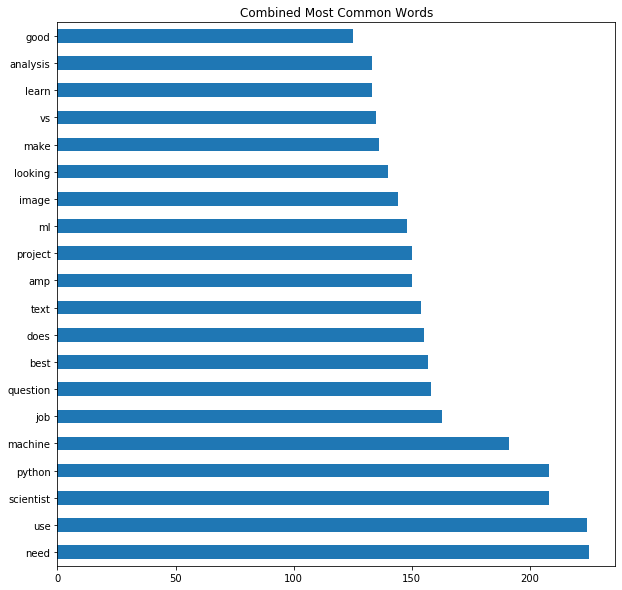

In [41]:
plt.figure(figsize=(10,10))
plt.title('Combined Most Common Words')
base_common.plot.barh();

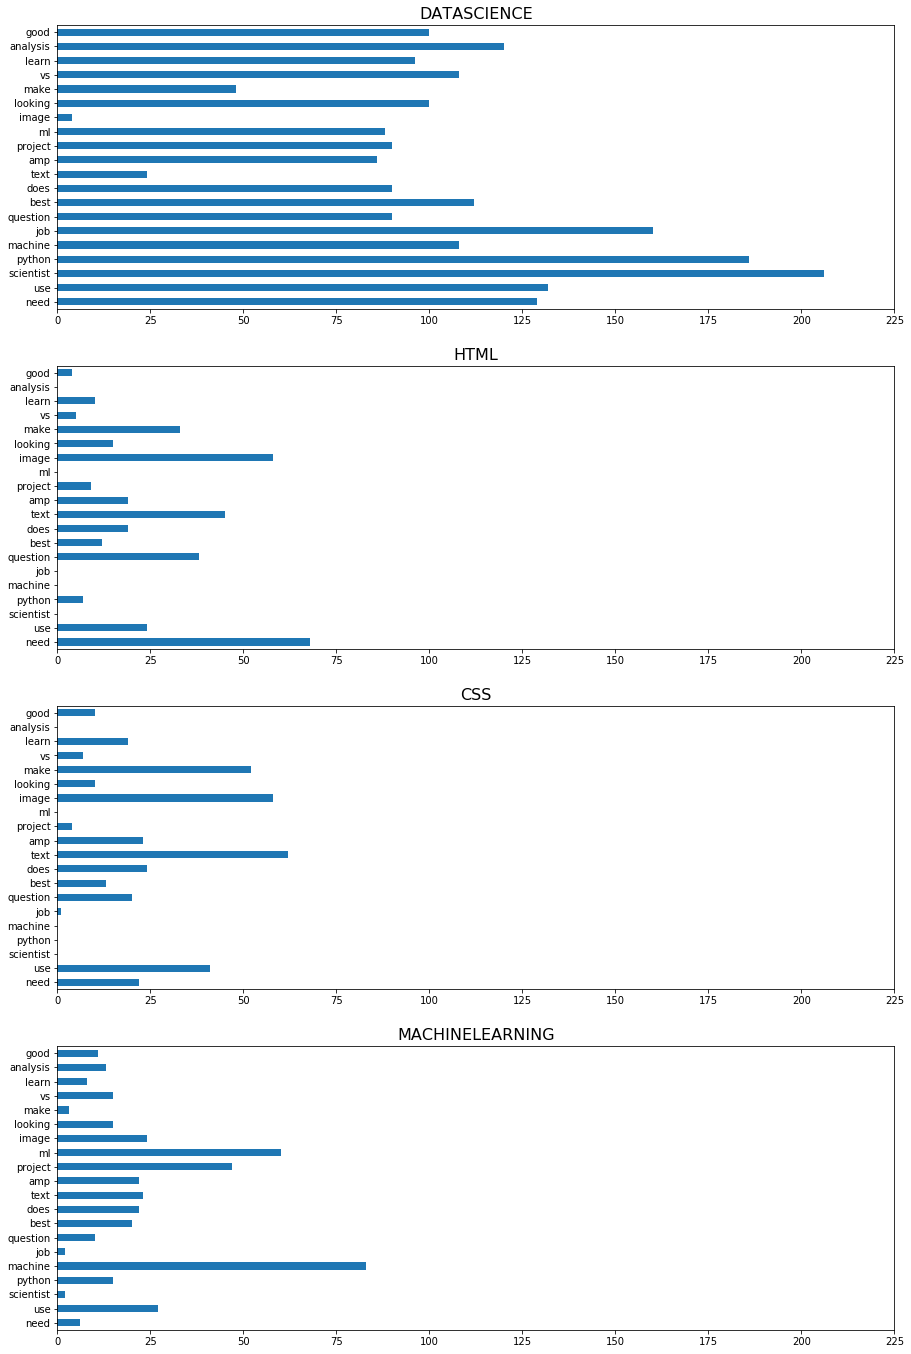

In [42]:
fig, ax = plt.subplots(ncols=1, nrows=len(df.subreddit.unique()), figsize=(15,6*len(df.subreddit.unique())))

for subplot_idx, sub in enumerate(df.subreddit.unique()):
    topic_features = features.loc[df['subreddit'] == sub, :]
    topic_features_to_plot = topic_features[base_common.index].sum()
    
    topic_features_to_plot.plot(kind='barh', ax=ax[subplot_idx])
    max_occurence = features.sum().max()
    ax[subplot_idx].set_xlim(0,max_occurence)
    ax[subplot_idx].set_title(sub.upper(), fontsize=16)

## ToDo for this section

1. make each of these functions only take two 

KeyError: "None of [Index(['need', 'use', 'scientist', 'python', 'machine', 'job', 'question',\n       'best', 'does', 'text', 'amp', 'project', 'ml', 'image', 'looking',\n       'make', 'vs', 'learn', 'analysis', 'good'],\n      dtype='object')] are in the [columns]"

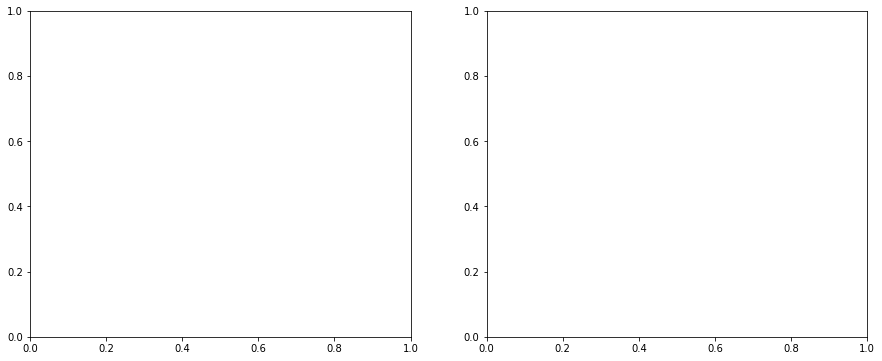

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
df[base_common.index].sum().plot.barh(ax=ax1, title='Science', color='navy')
ax1.set_xlim(0,2800)
ax2.set_xlim(0,2800)
tech[base_common.index].sum().plot.barh(ax=ax2, title='Technology', color='orange');

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))


groups = features.groupby(df['subreddit']).sum()[base_common.index].T.head(20)
plt.title('20 Most Common Words', fontsize=20)

groups.plot.bar(
                ax=ax,
                width=.8,
                # set style for colors instead of have to choose individually
                color=['gray','navy','orange','purple','red'],
                fontsize=15,
                );

# Word Clouds!!!

### Entire dataset

In [ ]:
make_cloud(X)

In [ ]:
fig = plt.figure(figsize=(14, 6*len(trimmed_list)))
for i, sub in enumerate(trimmed_list):
    ax = fig.add_subplot(len(trimmed_list),1,i+1)
    cloud = make_cloud(X=df[df['subreddit'] == sub]['title'])
    

    ax.set_title(topic.upper(), fontdict={'fontsize': 24})
    ax.imshow(cloud)
    ax.axis('off')


## To Do for this section

1. Confusion Matrix for all selected Topics
2. Make a function that will compare all topics in 1x1 fasion, find combinatorics or whatever Python library
3. Output each of the comparisons if a list of more than 2.

## Confusion Matrix

In [ ]:
lr_predictions = lr_grid.predict(X_test)

In [ ]:
lr_cm = confusion_matrix(y_test, lr_predictions)

In [ ]:
lr_confusion_df = pd.DataFrame(lr_cm, columns=topics, index=topics)

lr_confusion_df

In [ ]:
tn, fp, fn, tp = lr_cm.ravel()

### Specificity

In [ ]:
lr_spec = tn / (tn + fp)
lr_spec

### Sensitivity/Recall

In [ ]:
lr_sens = tp / (tp +fn)
lr_sens

### ROC AUC Score

In [ ]:
lr_auc = roc_auc_score(y_test, lr_predictions)
lr_auc

### ROC AUC Curve

In [ ]:
lr_probs = lr_grid.predict_proba(X_test)[:,1]

In [ ]:
# not multiclass
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(lr_fpr, lr_tpr, label=f'ROC curve (area = {lr_auc})', color='r', marker='D')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve Logistic Regression', size=20)
plt.legend(fontsize=14);

# Histograms!

In [ ]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(lr_probs, bins=25, color='b')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18);

In [ ]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
hst0 = plt.hist(lr_probs[y_test == 0],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Technology',)

hst1 = plt.hist(lr_probs[y_test == 1],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Science')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = max(hst1[0].max(), hst0[0].max()), # Max of the two highest respective hist values
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Science)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

# Thanks to Matt Brems for the colorful graphs! :)

In [ ]:
lr_feats = lr_grid.best_estimator_.named_steps['tfidf'].get_feature_names()

lr_catcher = lr_grid.best_estimator_.named_steps['lr']


plt.figure(figsize=(16, 12))
plt.title('Feature Importance (Coefficients)', fontsize=20)
plt.ylabel('Features', fontsize=18)
plt.xlabel('(Abs) Coefficients', fontsize=18)

coef_df = pd.DataFrame(lr_catcher.coef_, columns=lr_feats).T
coef_df['abs_coef'] = coef_df[0].abs()
coef_df.sort_values('abs_coef', ascending=False)[0].head(15).plot(kind='barh');

# coef_kill = coef_df.sort_values('abs_coef', ascending=False)[0].head(500).index

# coef_kill


# my_stops.extend(coef_kill)